## i. Introduction

By: George Kenji Putra

Dataset: **Plant Disease Recognition**

Objective: To run the model inference for Plant Desease Recognition - CV.ipynb.

## ii. Importing Libraries

In [1]:
# importing libraries to be used

import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings(action='ignore')

## iii. Data Loading

We are going to load the sample data from the internet to test our model.

In [2]:
# listing down the links to be tested to our model

url = [
       'https://greaterpitttreeservicepa.com/wp-content/uploads/2023/01/what-are-black-spots-on-tree-leaves-1000x600.jpg',
       'https://media.istockphoto.com/id/1309275432/photo/cedar-hawthorn-rust-pustules-in-summer.jpg?s=612x612&w=0&k=20&c=mJ_Gig4xmfJR_Vjj4q_tClKeQ3G_IOgDfUNKeFwX7dQ=',
       'https://cdn.shopify.com/s/files/1/0489/5922/6015/files/8_9d8166b7-0d36-4bee-a68d-e4d98393ea8a_480x480.jpg?v=1668683918',
       'https://d1bvpoagx8hqbg.cloudfront.net/originals/warak-arish-stuffed-grape-leaves-healthy-comfort-food-f8405482caac9e1a352f62755b16a3c8.jpg',
       'https://d3qz1qhhp9wxfa.cloudfront.net/growingproduce/wp-content/uploads/2016/03/Powdery-mildew-on-pumpkin-leaf-for-web.jpg',
       'https://images.squarespace-cdn.com/content/v1/54fbb611e4b0d7c1e151d22a/1468805440061-IAAR7N7IEP4TEB7SG7RF/Photo+Jul+16%2C+7+49+46+PM.jpg?format=1500w'
       ]

In [3]:
# load the model

model = load_model('plant_model.h5')

## xi. Model Inference

We will run the actual test of our model from the aforementioned links above.

In [4]:
# define the preprocessing function

def preprocess_image(image):
    image = image.resize((240, 240))
    image = image.convert('RGB')
    image = np.array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [5]:
# define the prediction function

def prediction(image):
    preprocessed_image = preprocess_image(image)
    classes = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(classes)
    class_labels = ['Healthy', 'Powdery', 'Rust']
    predicted_class = class_labels[predicted_class_index]
    return predicted_class

1/1 [==============================] - 0s 300ms/step


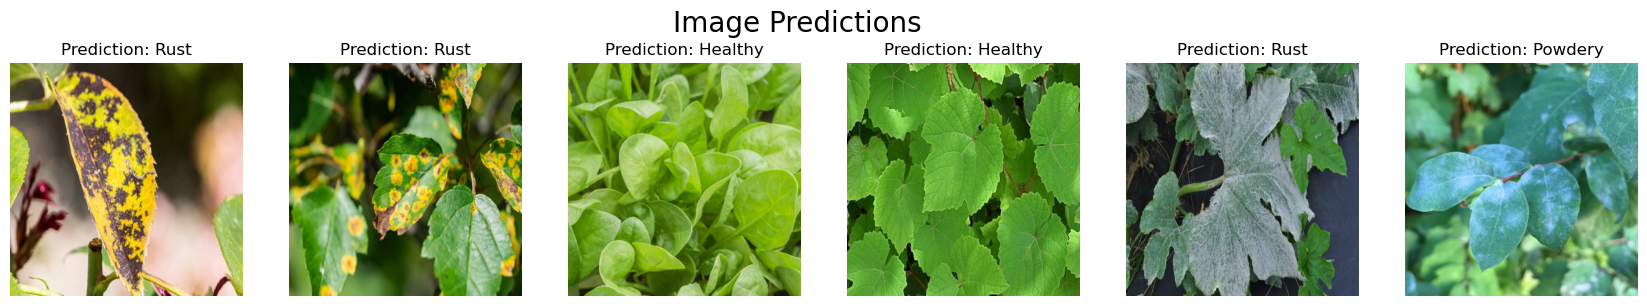

In [6]:
# showing the images with the predictions

plt.figure(figsize=(21, 3.5))
plt.suptitle('Image Predictions', fontsize = 20)

for i, img_url in enumerate(url):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    img_resized = img.resize((360, 360))
    predicted_class = prediction(img_resized)
    
    plt.subplot(1, len(url), i+1)
    plt.imshow(img_resized)
    plt.title('Prediction: ' + predicted_class)
    plt.axis('off')

plt.show()

The prediction results obtained from the model showcase a tendency towards predicting the `Rust` class more frequently compared to other classes. This observation prompts a deeper analysis to identify potential underlying factors contributing to this bias. 

Possible explanations encompass various aspects, such as the availability of limited or biased training data, the inherent complexity of the task at hand, the presence of significant variations within the dataset, and potential preprocessing or input-related challenges. These findings serve as valuable insights for conducting further investigations and undertaking targeted improvements to enhance the model's overall performance and mitigate any biases or limitations.